In [39]:
from dim_reduction_plots import *
from dim_reduction import *
from extract_data import *
import numpy as np
import pandas as pd
import os
import sys

import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('ggplot')

from allensdk.core.brain_observatory_cache import BrainObservatoryCache

In [9]:
manifest_path = os.path.join('/media/tom/Brain2016/','BrainObservatory','manifest.json')
boc = BrainObservatoryCache(manifest_file=manifest_path)

cell_list = None
n_max = 10

#results will be taked on to experiment_container dataframe
#could also take subset here, rather than all
df_expts = pd.DataFrame(boc.get_experiment_containers())
df_expts = df_expts.loc[0:2,:]
id_list = df_expts['id']
df_expts['fa'] = None
df_expts['pca'] = None
df_expts['dpca'] = None

for i, expt_container_id in enumerate(id_list):
    _, _, matAvg, ndAvg = extract_data_dg(boc, expt_container_id, selectcells=cell_list)
    n_components = min([n_max, matAvg.shape[1]])
    
    result = pc_analysis(matAvg, n_components)
    df_expts.at[i, 'pca'] = result['ev']
    
    result = factor_analysis(matAvg, n_components)
    df_expts.at[i, 'fa'] = result['ev']
    
    result = dpc_analysis(ndAvg, n_components)
    df_expts.at[i, 'dpca'] = result['ev']
 

In [8]:
df_expts.to_json('results_sg_all.json')

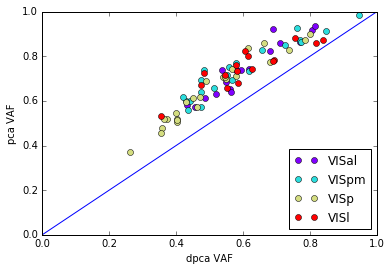

In [4]:
df_expts = pd.read_json('results_sg_all.json')

colorby = 'targeted_structure' # 'cre_line', 'targeted_structure', 'imaging_depth'
tecs = ['dpca','pca']
plot_all(df_expts, colorby, tecs)

PCA plotting

In [28]:
all_mean, matAll, matAvg, ndAvg = extract_data_dg(boc, expt_container_id, selectcells=cell_list)
interlength = 30
sweeplength = 60
tlength = interlength + sweeplength
timex = np.arange(tlength)

In [30]:
result = pc_analysis(matAvg, n_components)
matTrans= result['trans']

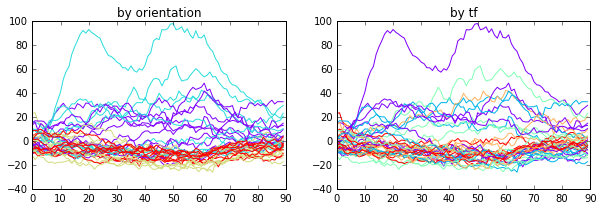

In [36]:
plotall_1d(all_mean, matTrans, timex, colorByOri=True)

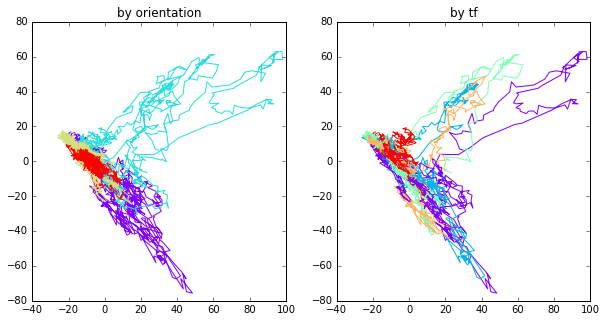

In [38]:
plotall_2d(all_mean, matTrans, timex, colorByOri=True)

dPCA plotting

In [21]:
result = dpc_analysis(ndAvg, n_components)
dec = result['obj']
Z = dec.transform(ndAvg)
N,F,O,T = ndAvg.shape

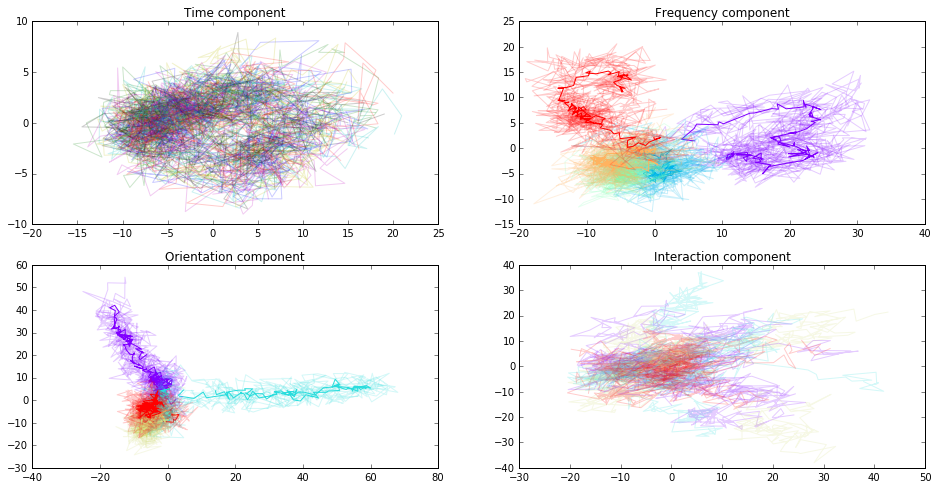

In [22]:
time = np.arange(T)

colorsd = plt.cm.rainbow(np.linspace(0,1,O))
colorso = np.tile(plt.cm.rainbow(np.linspace(0,1,O/2)),(2,1))
colorsf = plt.cm.rainbow(np.linspace(0,1,F))
a = 0.2

plt.figure(figsize=(16,8))
plt.subplot(221)

for f in xrange(F):
    for o in xrange(O):
        plt.plot(Z['t'][0,f,o],Z['t'][1,f,o], alpha=a)

plt.title('Time component')
    
plt.subplot(222)

for f in xrange(F):
    plt.plot(np.mean(Z['f'][0,f,:],axis=0),np.mean(Z['f'][1,f,:],axis=0),color=colorsf[f])
    for o in xrange(O):
        plt.plot(Z['f'][0,f,o],Z['f'][1,f,o],color=colorsf[f], alpha=a)
    
plt.title('Frequency component')
    
plt.subplot(223)

for o in xrange(O):
    plt.plot(np.mean(Z['o'][0,:,o],axis=0),np.mean(Z['o'][1,:,o],axis=0),color=colorso[o])
    for f in xrange(F):
        plt.plot(Z['o'][0,f,o],Z['o'][1,f,o],color=colorso[o], alpha=a)
    
plt.title('Orientation component')


plt.subplot(224)

for o in xrange(O):
    for f in xrange(F):
        plt.plot(Z['fo'][0,f,o],Z['fo'][1,f,o],color=colorso[o], alpha=a)
    
plt.title('Interaction component')
plt.show()

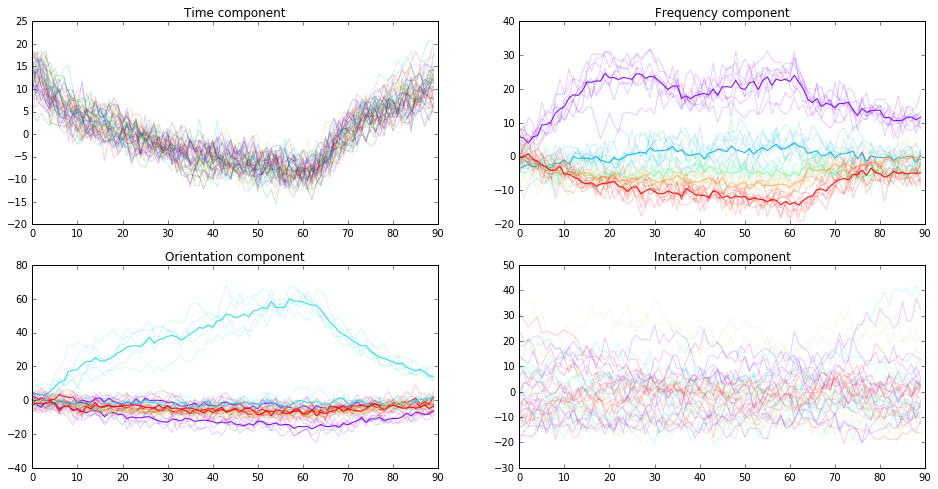

In [23]:
time = np.arange(T)

colorsd = plt.cm.rainbow(np.linspace(0,1,O))
colorso = np.tile(plt.cm.rainbow(np.linspace(0,1,O/2)),(2,1))
colorsf = plt.cm.rainbow(np.linspace(0,1,F))
a = 0.2

plt.figure(figsize=(16,8))
plt.subplot(221)

for f in xrange(F):
    for o in xrange(O):
        plt.plot(time,Z['t'][0,f,o], alpha=a)

plt.title('Time component')
    
plt.subplot(222)

for f in xrange(F):
    plt.plot(time,np.mean(Z['f'][0,f,:],axis=0),color=colorsf[f])
    for o in xrange(O):
        plt.plot(time,Z['f'][0,f,o],color=colorsf[f], alpha=a)
    
plt.title('Frequency component')
    
plt.subplot(223)

for o in xrange(O):
    plt.plot(time,np.mean(Z['o'][0,:,o],axis=0),color=colorso[o])
    for f in xrange(F):
        plt.plot(time,Z['o'][0,f,o],color=colorso[o], alpha=a)
    
plt.title('Orientation component')


plt.subplot(224)

for f in xrange(F):
    for o in xrange(O):
        plt.plot(time,Z['fo'][0,f,o],color=colorso[o], alpha=a)
    
plt.title('Interaction component')
plt.show()